In [15]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
import sklearn
import os
from scipy.stats import skew, kurtosis, entropy
from scipy.fft import fft

In [16]:
dir_path = r'C:\Users\Admin\Desktop\DS203\E7\MFCC-files-v2'
dir_files = os.listdir(dir_path)
print((dir_files))

ls_files = []

for file_name in dir_files:
    file_path = os.path.join(dir_path, file_name)
    mfcc_arr = genfromtxt(file_path, delimiter=',')
    ls_files.append(mfcc_arr)
    
print(len(ls_files))

['01-MFCC.csv', '02-MFCC.csv', '03-MFCC.csv', '04-MFCC.csv', '05-MFCC.csv', '06-MFCC.csv', '07-MFCC.csv', '08-MFCC.csv', '09-MFCC.csv', '10-MFCC.csv', '100-MFCC.csv', '101-MFCC.csv', '102-MFCC.csv', '103-MFCC.csv', '104-MFCC.csv', '105-MFCC.csv', '106-MFCC.csv', '107-MFCC.csv', '108-MFCC.csv', '109-MFCC.csv', '11-MFCC.csv', '110-MFCC.csv', '111-MFCC.csv', '112-MFCC.csv', '113-MFCC.csv', '114-MFCC.csv', '115-MFCC.csv', '116-MFCC.csv', '12-MFCC.csv', '13-MFCC.csv', '14-MFCC.csv', '15-MFCC.csv', '16-MFCC.csv', '17-MFCC.csv', '18-MFCC.csv', '19-MFCC.csv', '20-MFCC.csv', '21-MFCC.csv', '22-MFCC.csv', '23-MFCC.csv', '24-MFCC.csv', '25-MFCC.csv', '26-MFCC.csv', '27-MFCC.csv', '28-MFCC.csv', '29-MFCC.csv', '30-MFCC.csv', '31-MFCC.csv', '32-MFCC.csv', '33-MFCC.csv', '34-MFCC.csv', '35-MFCC.csv', '36-MFCC.csv', '37-MFCC.csv', '38-MFCC.csv', '39-MFCC.csv', '40-MFCC.csv', '41-MFCC.csv', '42-MFCC.csv', '43-MFCC.csv', '44-MFCC.csv', '45-MFCC.csv', '46-MFCC.csv', '47-MFCC.csv', '48-MFCC.csv', '49-MFC

In [17]:
ls_lengths = []
for i in range(len(ls_files)):
    ls_lengths.append(ls_files[i][0].shape[0])
    
array_lengths = np.array(ls_lengths)
print(np.max(array_lengths))

39751


In [18]:
new_ls_files = []
for i in range(len(ls_files)):
    lx = ls_files[i][0].shape[0]
    q = lx//100
    new_ls_file = ls_files[i][:, :q*100]
    new_ls_files.append(new_ls_file)
    
print(len(new_ls_files)) 

116


In [19]:
def calculateMeans(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_mean_elements = []
    for i in range(100):
        mean = np.mean(array[:, q*i:q*(i+1)], axis=1)
        ls_mean_elements.append(mean)
        
    ls_mean_elements = np.array(ls_mean_elements)
    ls_mean_elements = ls_mean_elements.reshape(20, -1)
    return ls_mean_elements


def calculateVariance(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_var_elements = []
    for i in range(100):
        var = np.var(array[:, q*i:q*(i+1)], axis=1)
        ls_var_elements.append(var)
    
    ls_var_elements = np.array(ls_var_elements)
    ls_var_elements = ls_var_elements.reshape(20, -1)
    return ls_var_elements

def calculateMinMax(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_min_elements = []
    ls_max_elements = []
    for i in range(100):
        min = np.min(array[:, q*i:q*(i+1)], axis=1)
        max = np.max(array[:, q*i:q*(i+1)], axis=1)
        ls_min_elements.append(min)
        ls_max_elements.append(max)
    
    ls_min_elements = np.array(ls_min_elements)
    ls_min_elements = ls_min_elements.reshape(20, -1)
    
    ls_max_elements = np.array(ls_max_elements)
    ls_max_elements = ls_max_elements.reshape(20, -1)
    return ls_min_elements, ls_max_elements

def calculateMedian(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_median_elements = []
    for i in range(100):
        val = np.median(array[:, q*i:q*(i+1)], axis=1)
        ls_median_elements.append(val)
    
    ls_median_elements = np.array(ls_median_elements)
    ls_median_elements = ls_median_elements.reshape(20, -1)
    return ls_median_elements

def calculateSumPTP(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_sum_elements = []
    ls_ptp_elements = []
    for i in range(100):
        sum = np.sum(array[:, q*i:q*(i+1)], axis=1)
        ptp = np.ptp(array[:, q*i:q*(i+1)], axis=1)
        ls_sum_elements.append(sum)
        ls_ptp_elements.append(ptp)
    
    ls_sum_elements = np.array(ls_sum_elements)
    ls_sum_elements = ls_sum_elements.reshape(20, -1)
    
    ls_ptp_elements = np.array(ls_ptp_elements)
    ls_ptp_elements = ls_ptp_elements.reshape(20, -1)
    return ls_sum_elements, ls_ptp_elements

def calculateSkewKurtosis(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_skew_elements = []
    ls_kurtosis_elements = []
    for i in range(100):
        skew_val = skew(array[:, q*i:q*(i+1)], axis=1)
        kurtosis_val = kurtosis(array[:, q*i:q*(i+1)], axis=1)
        ls_skew_elements.append(skew_val)
        ls_kurtosis_elements.append(kurtosis_val)
    
    ls_skew_elements = np.array(ls_skew_elements)
    ls_skew_elements = ls_skew_elements.reshape(20, -1)
    
    ls_kurtosis_elements = np.array(ls_kurtosis_elements)
    ls_kurtosis_elements = ls_kurtosis_elements.reshape(20, -1)
    return ls_skew_elements, ls_kurtosis_elements

In [20]:
def calculateStatistics(array):
    mean = calculateMeans(array)
    var = calculateVariance(array)
    min, max = calculateMinMax(array)
    median = calculateMedian(array)
    sum, ptp = calculateSumPTP(array)
    # skew_val, kurtosis_val = calculateSkewKurtosis(array)
    
    features = np.concatenate((mean, var, min, max, median, sum, ptp), axis=1) 
    return features

In [21]:
def calculateSpectralEnergy(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_spectral_energy_elements = []
    for i in range(100):
        spectral_energy = np.sum(np.abs(array[:, q*i:q*(i+1)])**2, axis=1)
        ls_spectral_energy_elements.append(spectral_energy)
        
    ls_spectral_energy_elements = np.array(ls_spectral_energy_elements)
    ls_spectral_energy_elements = ls_spectral_energy_elements.reshape(20, -1)
    return ls_spectral_energy_elements

def calculateDominantFrequency(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_dominant_frequency_elements = []
    for i in range(100):
        dominant_frequency = np.argmax(np.abs(fft(array[:, q*i:q*(i+1)], axis=1)), axis=1)
        ls_dominant_frequency_elements.append(dominant_frequency)
        
    ls_dominant_frequency_elements = np.array(ls_dominant_frequency_elements)
    ls_dominant_frequency_elements = ls_dominant_frequency_elements.reshape(20, -1)
    return ls_dominant_frequency_elements

def calculatePercentile(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_percentile_25_elements = []
    ls_percentile_75_elements = []
    for i in range(100):
        percentile_25 = np.percentile(array[:, q*i:q*(i+1)], 25, axis=1)
        percentile_75 = np.percentile(array[:, q*i:q*(i+1)], 75, axis=1)
        ls_percentile_25_elements.append(percentile_25)
        ls_percentile_75_elements.append(percentile_75)
    
    ls_percentile_25_elements = np.array(ls_percentile_25_elements)
    ls_percentile_25_elements = ls_percentile_25_elements.reshape(20, -1)
    
    ls_percentile_75_elements = np.array(ls_percentile_75_elements)
    ls_percentile_75_elements = ls_percentile_75_elements.reshape(20, -1)
    return ls_percentile_25_elements, ls_percentile_75_elements

def calculateSignalEntropy(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_signal_entropy_elements = []
    for i in range(100):
        signal_entropy = entropy(array[:, q*i:q*(i+1)], axis=1)
        ls_signal_entropy_elements.append(signal_entropy)
        
    ls_signal_entropy_elements = np.array(ls_signal_entropy_elements)
    ls_signal_entropy_elements = ls_signal_entropy_elements.reshape(20, -1)
    return ls_signal_entropy_elements

def calculateZeroCrossingRate(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_zcr_elements = []
    for i in range(100):
        zcr = np.sum(np.diff(np.sign(array[:, q*i:q*(i+1)]), axis=1) != 0, axis=1)
        ls_zcr_elements.append(zcr)
        
    ls_zcr_elements = np.array(ls_zcr_elements)
    ls_zcr_elements = ls_zcr_elements.reshape(20, -1)
    return ls_zcr_elements

def calculateRMS(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_rms_elements = []
    for i in range(100):
        rms = np.sqrt(np.sum(array[:, q*i:q*(i+1)]**2, axis=1))
        ls_rms_elements.append(rms)
        
    ls_rms_elements = np.array(ls_rms_elements)
    ls_rms_elements = ls_rms_elements.reshape(20, -1)
    return ls_rms_elements


def calculateVarAbsDiff(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_vad_elements = []
    for i in range(100):
        vad = np.var(np.diff(array[:, q*i:q*(i+1)], axis=1), axis=1)
        ls_vad_elements.append(vad)
        
    ls_vad_elements = np.array(ls_vad_elements)
    ls_vad_elements = ls_vad_elements.reshape(20, -1)
    return ls_vad_elements

In [22]:
def calculateRelvantFeatures(array):
    spectral_energy = calculateSpectralEnergy(array)
    dominant_frequency = calculateDominantFrequency(array)
    percentile_25, percentile_75 = calculatePercentile(array)
    # signal_entropy = calculateSignalEntropy(array)
    zero_crossing_rate = calculateZeroCrossingRate(array)
    root_mean_square = calculateRMS(array)
    variance_absolute_difference = calculateVarAbsDiff(array)
    
    features = np.concatenate((spectral_energy, dominant_frequency, zero_crossing_rate, percentile_25, percentile_75, root_mean_square, variance_absolute_difference), axis=1)
    return features

In [23]:
#     # Unique features
#     features[i, 10] = np.sum(np.abs(fft(window))**2)  # Spectral energy
#     features[i, 11] = np.argmax(np.abs(fft(window)))  # Dominant frequency
#     features[i, 12] = np.percentile(window, 25)       # 25th percentile
#     features[i, 13] = np.percentile(window, 75)       # 75th percentile
#     features[i, 14] = entropy(np.histogram(window, bins=10)[0])  # Signal entropy
#     features[i, 15] = np.sum(np.diff(np.sign(window)) != 0)  # Zero crossing rate
#     features[i, 17] = np.sqrt(np.mean(window**2))     # RMS
#     features[i, 18] = np.var(np.diff(window))         # Variance of absolute differences
#     features[i, 19] = np.polyfit(np.arange(window_size), window, 1)[0]  # Slope of linear fit

In [24]:
features_list = []
for i in range(len(new_ls_files)):
    features = calculateStatistics(new_ls_files[i])
    features_list.append(features)
    
features_array = np.array(features_list)
features_array.shape

(116, 20, 700)

In [25]:
relevant_features_list = []
for i in range(len(new_ls_files)):
    features = calculateRelvantFeatures(new_ls_files[i])
    relevant_features_list.append(features)
    
relevant_features_array = np.array(relevant_features_list)
relevant_features_array.shape

(116, 20, 700)

In [26]:
all_features = np.concatenate((features_array, relevant_features_array), axis = 2)
all_features.shape

(116, 20, 1400)


Clustering Results for KMeans:


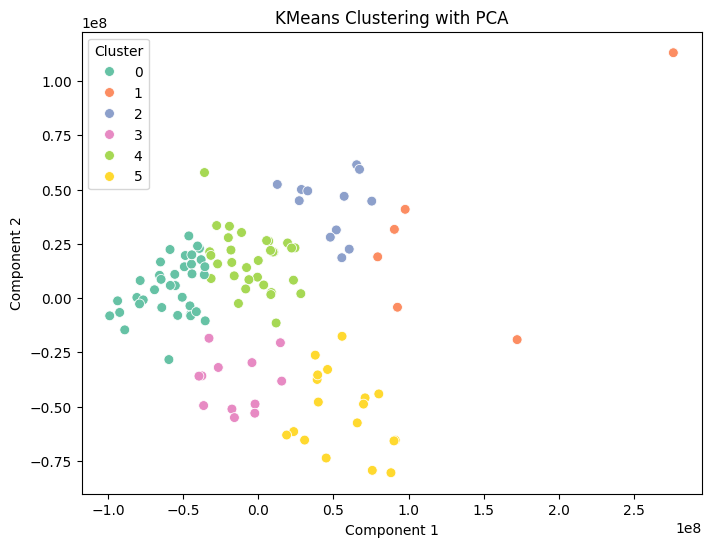

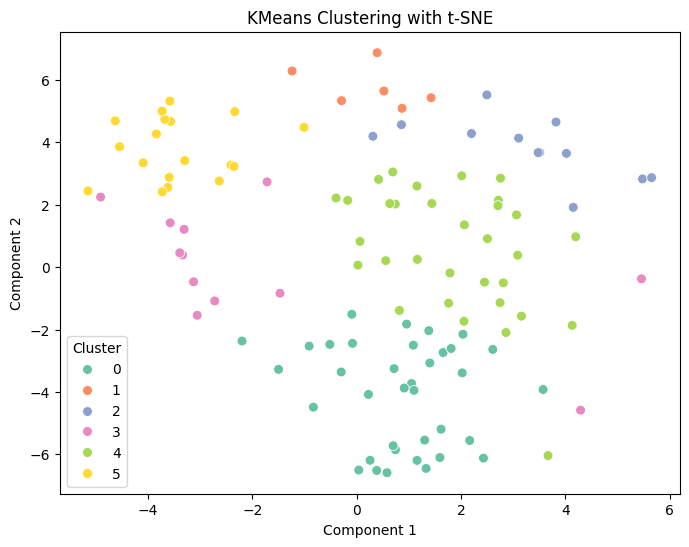


Clustering Results for Agglomerative:


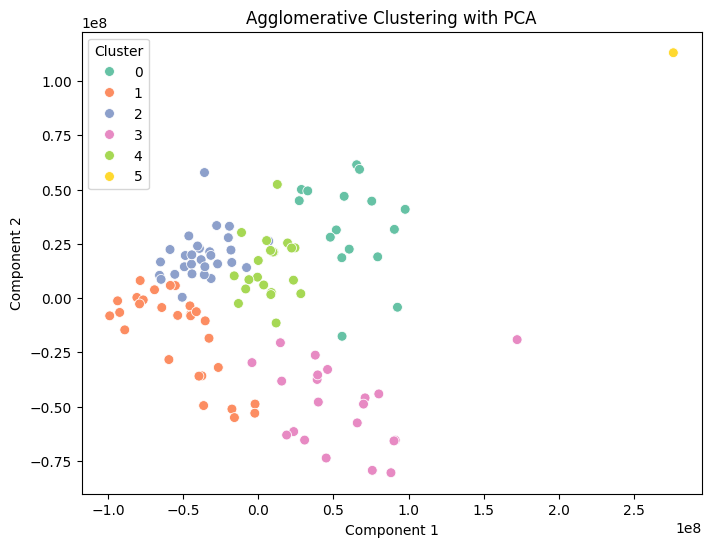

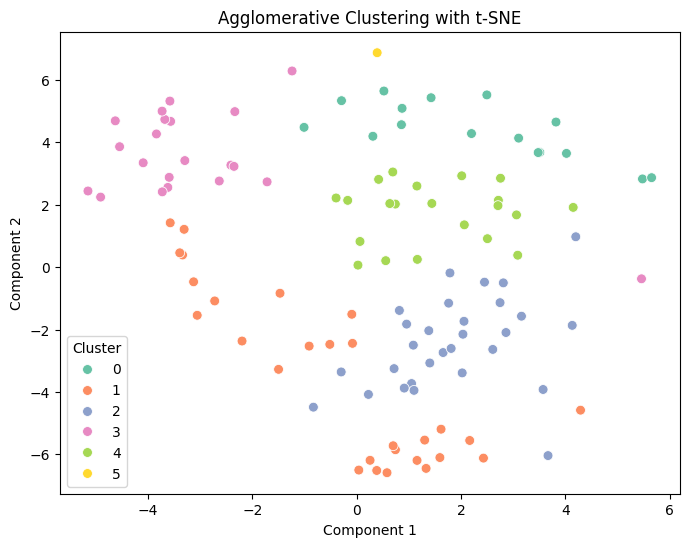


Clustering Results for DBSCAN:


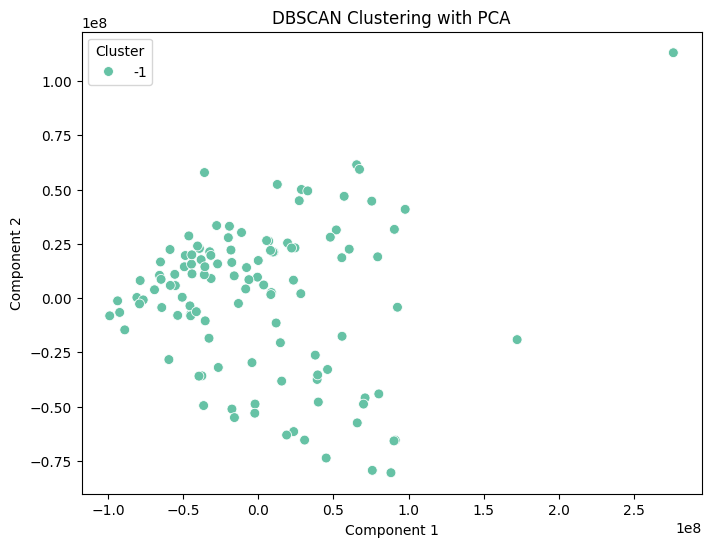

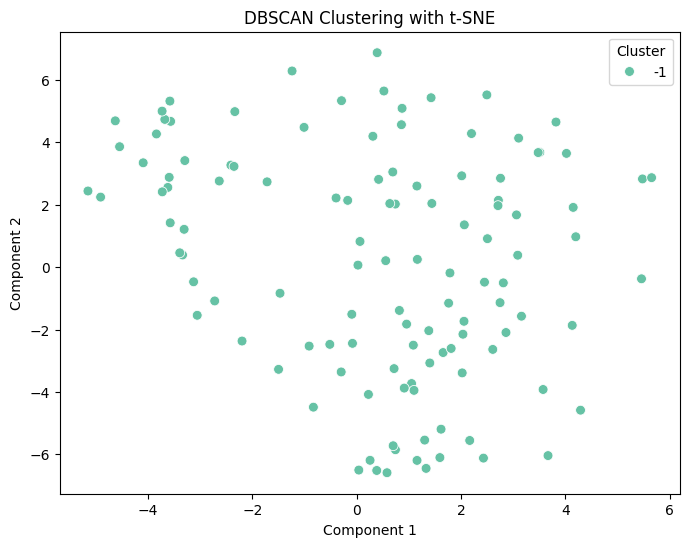

In [29]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: 116 samples of shape (20, 900)
data = np.array(all_features)  # Replace with your actual data

# Flatten each sample to a 1D vector of length 18000
data_flattened = data.reshape(116, -1)

# Define the number of clusters
n_clusters = 6

# Clustering Methods
clustering_methods = {
    "KMeans": KMeans(n_clusters=n_clusters, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=n_clusters),
    "DBSCAN": DBSCAN(eps=3, min_samples=2)  # DBSCAN parameters may need tuning
}

# Evaluation metrics dictionary
evaluation_metrics = {
    "Silhouette Score": silhouette_score,
    "Davies-Bouldin Index": davies_bouldin_score,
    "Calinski-Harabasz Index": calinski_harabasz_score
}

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_flattened)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_flattened)

# Function to plot clusters
def plot_clusters(data_2d, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='Set2', s=50, marker='o')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster", loc="best")
    plt.show()

# Perform clustering, evaluate metrics, and visualize
for name, method in clustering_methods.items():
    # Fit and get cluster labels
    if name == "DBSCAN":
        labels = method.fit_predict(data_flattened)
    else:
        labels = method.fit_predict(data_flattened)

    # Display evaluation metrics
    print(f"\nClustering Results for {name}:")
    for metric_name, metric_func in evaluation_metrics.items():
        try:
            score = metric_func(data_flattened, labels)
            # print(f"{metric_name}: {score:.4f}")
        except ValueError as e:
            pass
            # print(f"{metric_name}: Not applicable for {name} (e.g., single cluster detected).")

    # Visualize clusters with PCA
    plot_clusters(data_pca, labels, f"{name} Clustering with PCA")

    # Visualize clusters with t-SNE
    plot_clusters(data_tsne, labels, f"{name} Clustering with t-SNE")


In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Example data: 116 samples of shape (20, 900)
# data = np.random.rand(116, 20, 900)  # Replace with your actual data

# # Flatten each sample to a 1D vector of length 18000
# data_flattened = data.reshape(116, -1)

# # Define the number of clusters
# n_clusters = 6

# # Apply KMeans Clustering
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# labels_kmeans = kmeans.fit_predict(data_flattened)

# # Apply Agglomerative Clustering
# agglo = AgglomerativeClustering(n_clusters=n_clusters)
# labels_agglo = agglo.fit_predict(data_flattened)

# # Apply DBSCAN Clustering (epsilon and min_samples may need tuning)
# dbscan = DBSCAN(eps=3, min_samples=2)
# labels_dbscan = dbscan.fit_predict(data_flattened)

# # Reduce dimensions with PCA for visualization
# pca = PCA(n_components=2)
# data_pca = pca.fit_transform(data_flattened)

# # Alternative dimensionality reduction with t-SNE
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# data_tsne = tsne.fit_transform(data_flattened)

# # Visualization of clustering results

# def plot_clusters(data_2d, labels, title):
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='Set2', s=50, marker='o')
#     plt.title(title)
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 2")
#     plt.legend(title="Cluster")
#     plt.show()

# # Visualize KMeans clustering with PCA and t-SNE
# plot_clusters(data_pca, labels_kmeans, "KMeans Clustering with PCA")
# plot_clusters(data_tsne, labels_kmeans, "KMeans Clustering with t-SNE")

# # Visualize Agglomerative Clustering with PCA and t-SNE
# plot_clusters(data_pca, labels_agglo, "Agglomerative Clustering with PCA")
# plot_clusters(data_tsne, labels_agglo, "Agglomerative Clustering with t-SNE")

# # Visualize DBSCAN Clustering with PCA and t-SNE
# plot_clusters(data_pca, labels_dbscan, "DBSCAN Clustering with PCA")
# plot_clusters(data_tsne, labels_dbscan, "DBSCAN Clustering with t-SNE")


In [ ]:
# # Define window size and number of features per window
# window_size = 100
# num_windows = len(data) // window_size
# num_features_per_window = 10 + 10  # 10 original + 10 unique

# # Initialize array to store extracted features
# features = np.zeros((num_windows, num_features_per_window))

# # Loop through each window and calculate the statistics
# for i in range(num_windows):
#     window = data[i * window_size : (i + 1) * window_size]
    
#     # Original statistical features
#     features[i, 0] = np.mean(window)
#     features[i, 1] = np.var(window)
#     features[i, 2] = np.std(window)
#     features[i, 3] = np.min(window)
#     features[i, 4] = np.max(window)
#     features[i, 5] = np.median(window)
#     features[i, 6] = skew(window)
#     features[i, 7] = kurtosis(window)
#     features[i, 8] = np.ptp(window)  # Range (max - min)
#     features[i, 9] = np.sum(window)
    
#     # Unique features
#     features[i, 10] = np.sum(np.abs(fft(window))**2)  # Spectral energy
#     features[i, 11] = np.argmax(np.abs(fft(window)))  # Dominant frequency
#     features[i, 12] = np.percentile(window, 25)       # 25th percentile
#     features[i, 13] = np.percentile(window, 75)       # 75th percentile
#     features[i, 14] = entropy(np.histogram(window, bins=10)[0])  # Signal entropy
#     features[i, 15] = np.sum(np.diff(np.sign(window)) != 0)  # Zero crossing rate
#     features[i, 16] = np.correlate(window, window, mode='valid')[0]  # Autocorrelation
#     features[i, 17] = np.sqrt(np.mean(window**2))     # RMS
#     features[i, 18] = np.var(np.diff(window))         # Variance of absolute differences
#     features[i, 19] = np.polyfit(np.arange(window_size), window, 1)[0]  # Slope of linear fit